In [1]:
# imports
import numpy as np
from csv_utils import df
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from graph_utils import show_frequency, show_numerical_attribute_distribution, show_categorical_attribute_histogram, show_numerical_corellation, show_categorical_corellation
from logistic import split_dataset, train_logistic, predict_logistic, accuracy

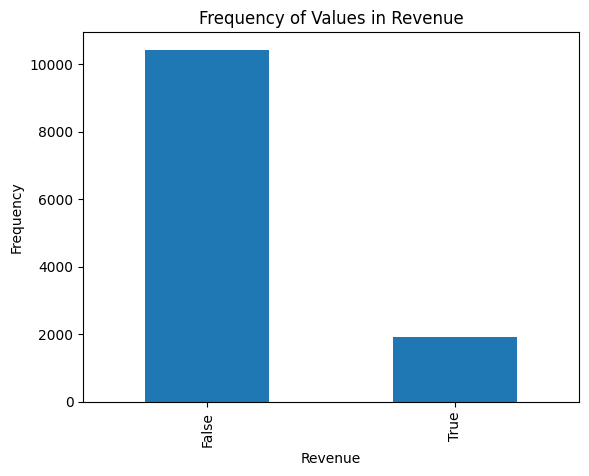

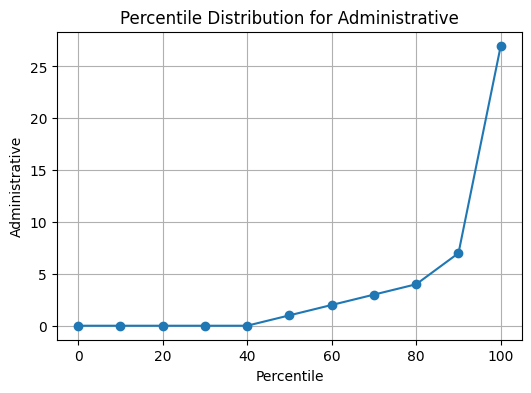

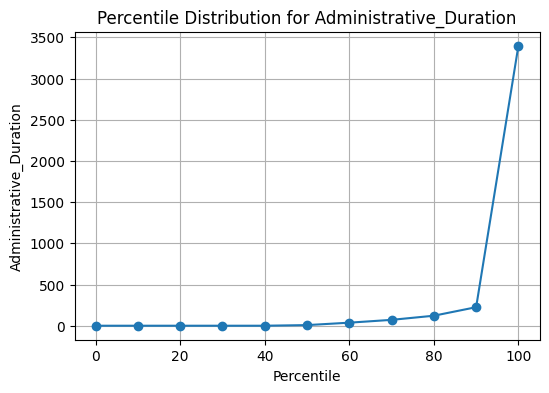

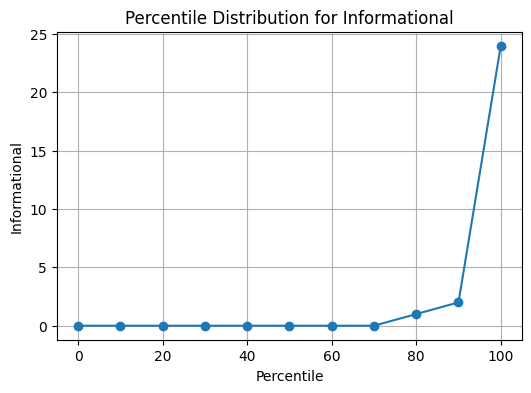

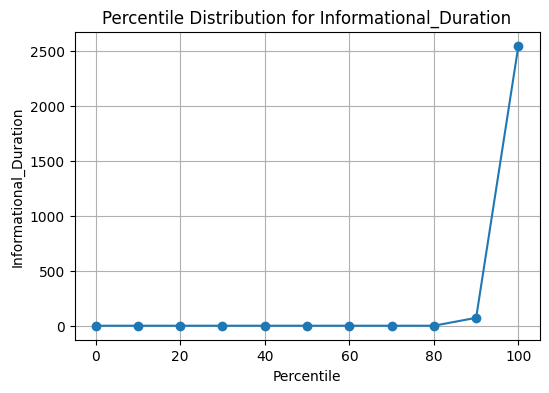

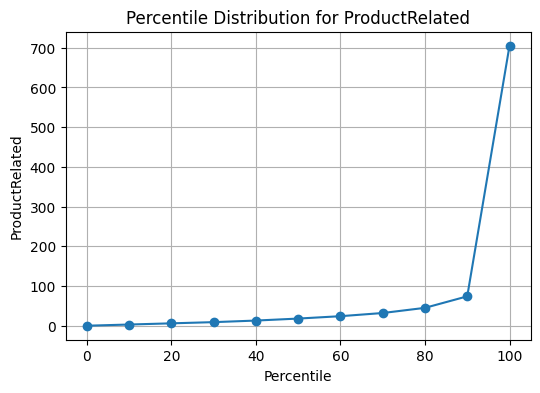

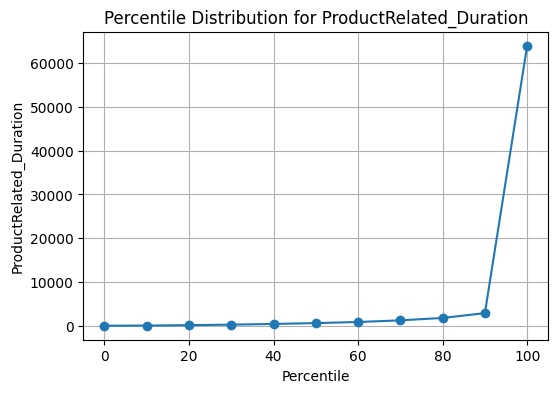

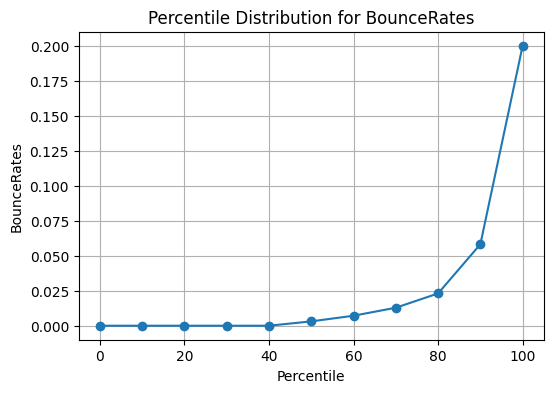

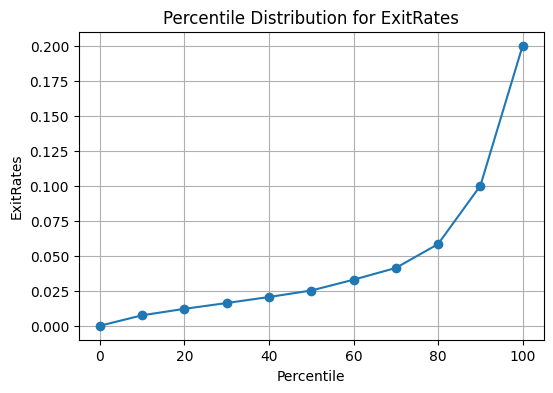

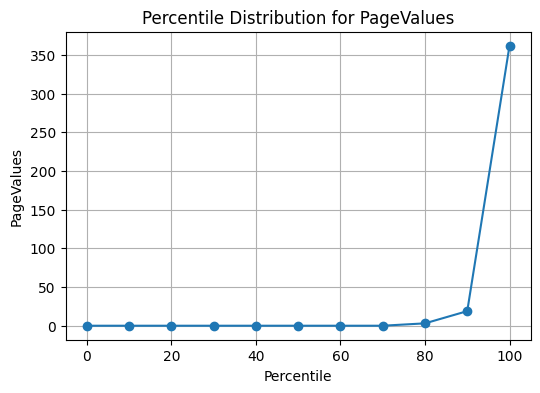

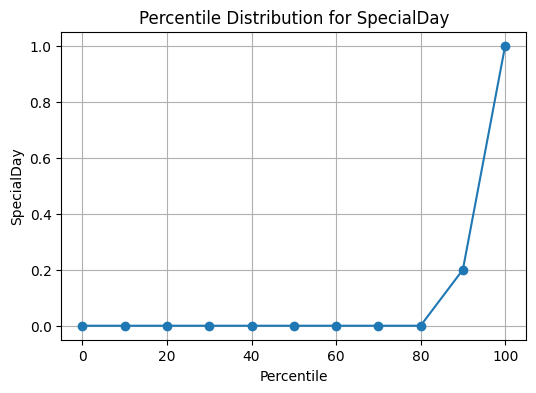

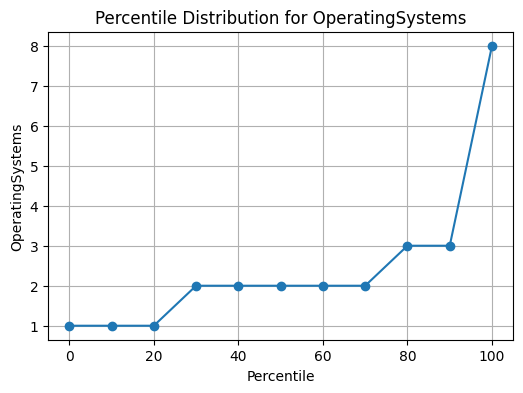

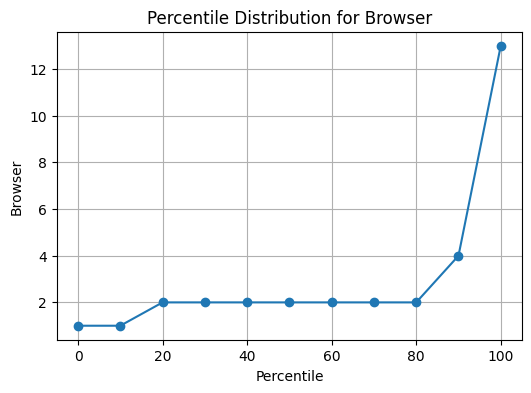

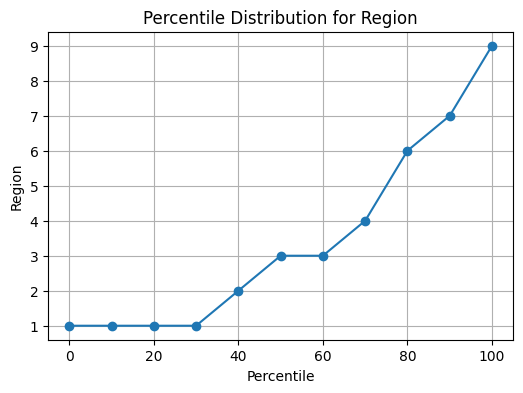

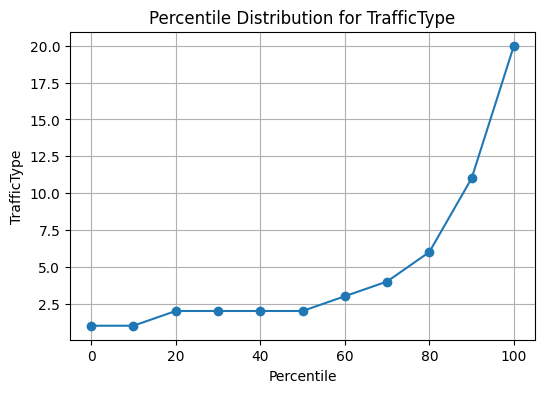

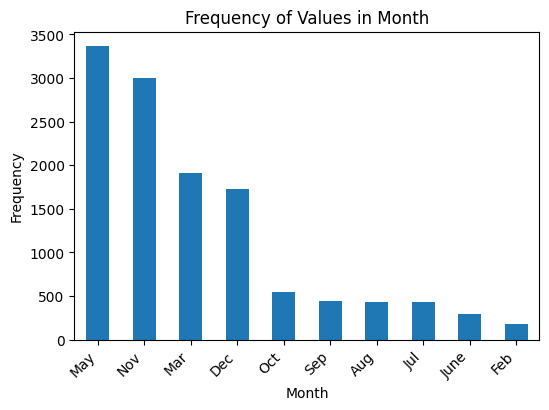

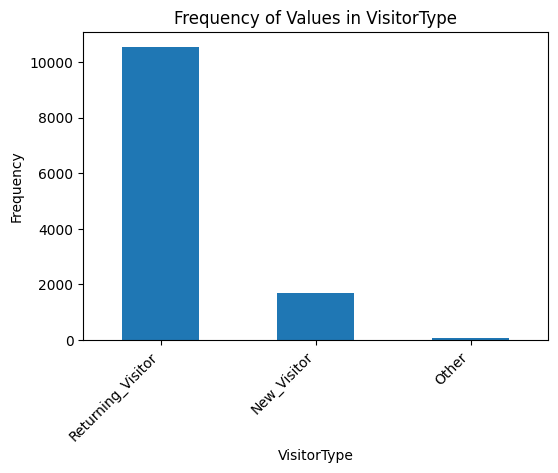

In [2]:
# data exploration
show_frequency(df, 'Revenue')
show_numerical_attribute_distribution(df)
show_categorical_attribute_histogram(df)

                         Coefficient        P-value
Administrative              0.138917   3.519760e-54
Administrative_Duration     0.093587   2.146514e-25
Informational               0.095200   3.174034e-26
Informational_Duration      0.070345   5.282871e-15
ProductRelated              0.158538   3.241187e-70
ProductRelated_Duration     0.152373   6.115338e-65
BounceRates                -0.150673   1.594198e-63
ExitRates                  -0.207071  1.662654e-119
PageValues                  0.492569   0.000000e+00
SpecialDay                 -0.082305   5.498934e-20
OperatingSystems           -0.014668   1.033943e-01
Browser                     0.023984   7.736888e-03
Region                     -0.011595   1.979426e-01
TrafficType                -0.005113   5.702434e-01


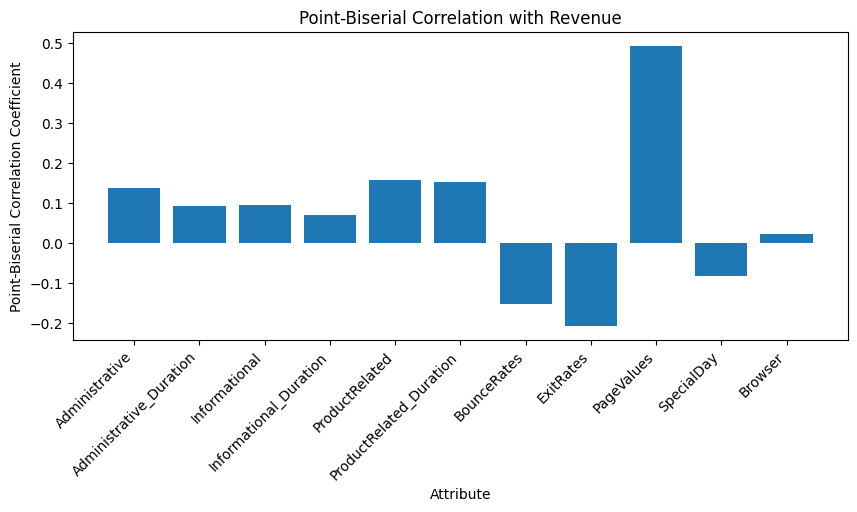

                   Chi2       P-value
Month        384.934762  2.238786e-77
VisitorType  135.251923  4.269904e-30


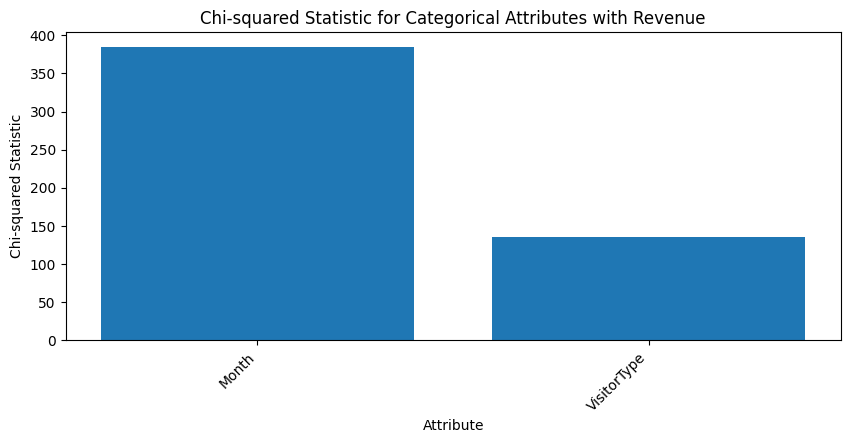

In [3]:
# correlation
show_numerical_corellation(df)
show_categorical_corellation(df)

# Logistic Regression

In [4]:
# data preprocessing
label_encoder = LabelEncoder()
categorical_attributes = df.select_dtypes(include=object).columns
for attribute in categorical_attributes:
    df[attribute] = label_encoder.fit_transform(df[attribute])
numerical_attributes = df.select_dtypes(include=np.number).columns
scaler = 0
match scaler:
    case 0:
        scaler = MinMaxScaler()
    case 1:
        scaler = StandardScaler()
    case 2:
        scaler = RobustScaler()
for attribute in numerical_attributes:
    df[attribute] = scaler.fit_transform(df[attribute].values.reshape(-1, 1))

In [5]:
X = df.drop('Revenue', axis=1).values.astype(np.float32)
T = df['Revenue'].values.astype(np.float32)

In [6]:
# manual implementation
X_train, T_train, X_test, T_test = split_dataset(X, T)
W = train_logistic(X_train, T_train)
Y = predict_logistic(X_test, W)
acc = accuracy(Y, T_test)
print(f"Accuracy: {acc}")

Accuracy: 0.778183292781833


In [7]:
# scikit-learn implementation
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.8)
model = LogisticRegression()
model.fit(X_train, T_train)
Y = model.predict(X_test)
acc = accuracy_score(T_test, Y)
print(f'Accuracy: {acc}')

Accuracy: 0.8606042173560422


# Decision Trees

In [8]:
# data preprocessing
numerical_attributes = df.select_dtypes(include=np.number).columns
minmax_scaler = MinMaxScaler()

for attribute in numerical_attributes:
    df[attribute] = minmax_scaler.fit_transform(df[attribute].values.reshape(-1, 1))

In [9]:
X = df.drop('Revenue', axis=1).values.astype(np.float32)
T = df['Revenue'].values.astype(np.float32)

In [10]:
# sci-kit learn implementation
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.8)
model = DecisionTreeClassifier()
model.fit(X_train, T_train)
Y = model.predict(X_test)
acc = accuracy_score(T_test, Y)
print(f"Accuracy: {acc}")

Accuracy: 0.8531021897810219


In [ ]:
# manual implementation